<a href="https://colab.research.google.com/github/wynn918/ML/blob/main/Parameter_adjust_in_RTR_breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
data = load_breast_cancer()
data.data.shape

(569, 30)

In [5]:
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
score_pre = cross_val_score(rfc, data.data,data.target, cv=10).mean()
score_pre

0.9649122807017545

0.9649122807017545 111


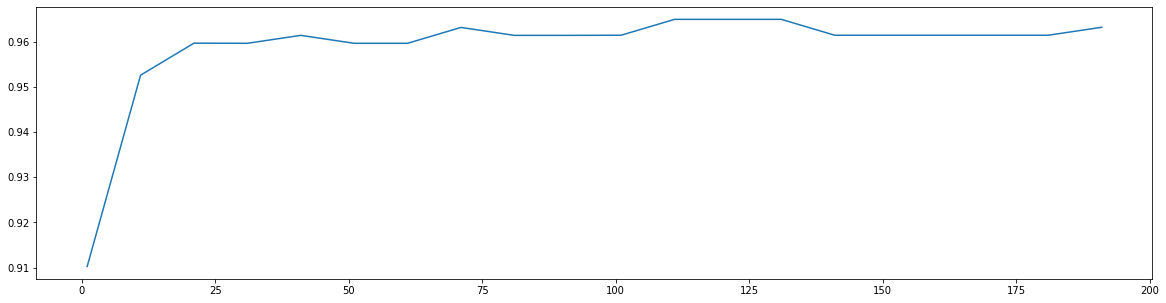

In [6]:
# n_estimators

scorel = []
for i in range(0,200,10):
  rfc = RandomForestClassifier(n_estimators=i+1,
                               n_jobs=-1,#The number of jobs to run in parallel for both fit and predict. If -1, then the number of jobs is set to the number of cores.
                               random_state=0)
  score = cross_val_score(rfc, data.data, data.target, cv=10).mean()
  scorel.append(score)

print(max(scorel),(scorel.index(max(scorel))*10)+1)
plt.figure(figsize=[20,5])
plt.plot(range(1,201,10),scorel)
plt.show()

0.9666666666666666 110


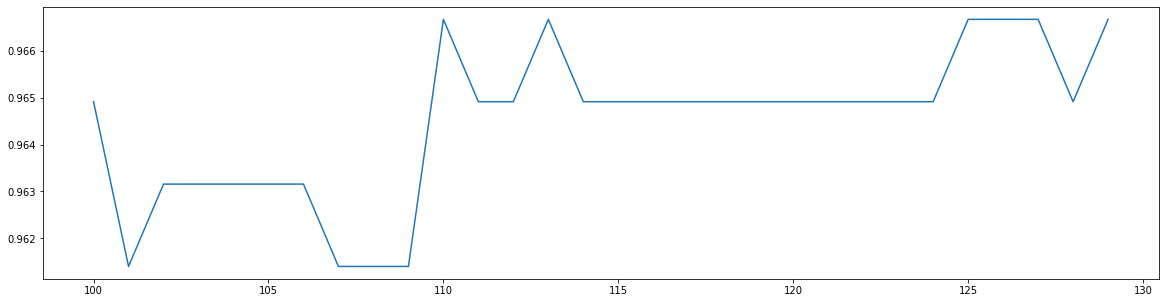

In [15]:
scorel = []
for i in range(100,130):
  rfc = RandomForestClassifier(n_estimators=i,
                               n_jobs=-1,
                               random_state=0)
  score = cross_val_score(rfc, data.data, data.target, cv=10).mean()
  scorel.append(score)

print(max(scorel),([*range(100,130)][scorel.index(max(scorel))]))

plt.figure(figsize=[20,5])
plt.plot(range(100,130),scorel)
plt.show()

In [ ]:
# max_depth
param_grid = {'max_depth':np.arange(1,20,1)}

rfc = RandomForestClassifier(n_estimators=110,
                             random_state=0)

gs = GridSearchCV(rfc, param_grid, cv=10)
gs.fit(data.data, data.target)

In [17]:
gs.best_params_

{'max_depth': 11}

In [18]:
gs.best_score_

0.9666666666666666

In [ ]:
# Since min_samples_leaf and mix_samples_split should be as small as possible,they don't need to adjust

In [ ]:
# max_feature（The default is auto, It's the square root of the total number of features）
param_grid = {'max_features':np.arange(5,30,1)}

rfc = RandomForestClassifier(n_estimators=110,
                             random_state=0)

gs = GridSearchCV(rfc, param_grid, cv=10)
gs.fit(data.data, data.target)

In [21]:
gs.best_params_

{'max_features': 7}

In [22]:
gs.best_score_

0.968421052631579

In [ ]:
param_grid = {'min_samples_leaf':np.arange(1,1+10,1)}

rfc = RandomForestClassifier(n_estimators=110,
                             random_state=0)

gs = GridSearchCV(rfc, param_grid, cv=10)
gs.fit(data.data, data.target)

In [25]:
print(gs.best_params_,gs.best_score_)

{'min_samples_leaf': 1} 0.9666666666666666


In [ ]:
param_grid = {'min_samples_split':np.arange(2,2+10,1)}

rfc = RandomForestClassifier(n_estimators=110,
                             random_state=0)

gs = GridSearchCV(rfc, param_grid, cv=10)
gs.fit(data.data, data.target)

In [27]:
print(gs.best_params_,gs.best_score_)

{'min_samples_split': 2} 0.9666666666666666


In [28]:
param_grid = {'criterion':['gini','entropy']}

rfc = RandomForestClassifier(n_estimators=110,
                             random_state=0)

gs = GridSearchCV(rfc, param_grid, cv=10)
gs.fit(data.data, data.target)

print(gs.best_params_,gs.best_score_)

{'criterion': 'entropy'} 0.9683897243107771


In [30]:
rfc = RandomForestClassifier(n_estimators=110,
                             criterion='entropy',
                             max_features=7,
                             random_state=0)
score = cross_val_score(rfc, data.data, data.target, cv=10).mean()
score

0.9719298245614036